# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Data

Fruits 360 Dataset : https://www.kaggle.com/moltean/fruits

In [ ]:
# jupyter notebook에서 shell 명령어(linux 명령어) 실행
!wget https://bit.ly/fruits_300 -o fruits_300.npy
# 웹주소(https://...)에 있는 파일을 다운로드해서 파일(fruits_300.npy)로 저장

In [ ]:
# 파일을 읽어서 numpy 배열을 리턴 
fruits = np.load('fruits_300')

In [ ]:
fruits.shape

(300, 100, 100)

## 데이터 시각화

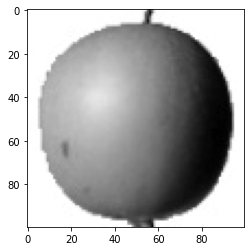

In [ ]:
# 첫번재 이미지 시각화
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
np.ceil(10), np.ceil(10.1)

(10.0, 11.0)

In [ ]:
def plot_fruit(images):
    """한줄에 최대10개의 이미지를 출력. 줄의 개수는 이미지의 개수에 따라서 결정
    """    
    n = len(images)  # 이미지 개수 
    cols = 10  # 한줄에 출력할 이미지 개수 
    rows = int(np.ceil(n / cols))  # 이미지를 출력할 줄(행)의 개수 <- 배열의 인덱스는 정수여야 하기 때문에
    # 이미지를 출력할 행/열의 개수만큼 subplot을 생성 
    # figsize=(width, height)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows))
    for i in range(rows):  # 행의 개수만큼 반복
        for j in range(cols):  # 열의 개수만큼 반복
            img_idx = i * 10 + j
            if rows == 1: # 행의 개수가 1인 경우, subplot은 1차원 배열! 
                if img_idx < n: # 이미지가 있는 인덱스에 대해서만 그림을 그림 
                    axes[img_idx].imshow(images[img_idx], cmap=plt.cm.binary)
                axes[img_idx].axis('off')
            else: 
                if img_idx < n: # 이미지가 있는 인덱스에 대해서만 이미지 출력
                    axes[i, j].imshow(images[img_idx], cmap=plt.cm.binary)
                axes[i, j].axis('off')

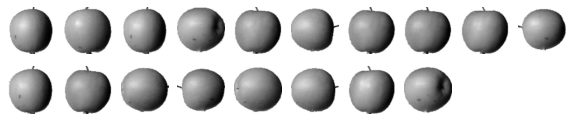

In [ ]:
plot_fruit(fruits[0:18])
plt.show()

# 이미지 픽셀 분석 

In [ ]:
fruits.shape

(300, 100, 100)

In [ ]:
apples = fruits[0:100].reshape((100, 100*100))
#> (100, 100, 100) 모양의 3차원 배열을 (100, 10_1000) 2차원 배열로 변환
apples.shape

(100, 10000)

In [ ]:
pineapples = fruits[100:200].reshape((100, 100*100))
bananas = fruits[200:300].reshape((100, 100*100))

## 각각의 이미지의 모든 픽셀(100*100픽셀)의 평균 

In [ ]:
apples_mean = np.mean(apples, axis=1)  #> (100,) 모양의 1차원 배열
apples_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

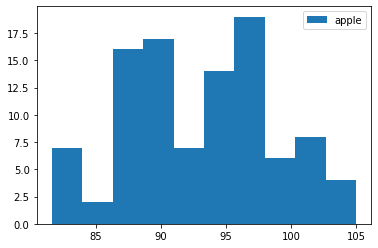

In [ ]:
# 사과 이미지의 (100x100개) 픽셀들의 평균 분포
plt.hist(apples_mean, label='apple')
# plt.hist(np.mean(bananas, axis=1), label='bananas')
# plt.hist(np.mean(pineapples, axis=1), label='pineapples')

plt.legend()
plt.show()

In [ ]:
pineapples_mean = np.mean(pineapples, axis=1)
bananas_mean = np.mean(bananas, axis=1)


In [ ]:
pineapples_mean.shape, bananas_mean.shape

((100,), (100,))

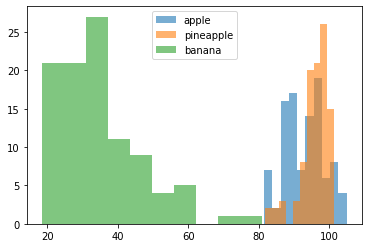

In [ ]:
plt.hist(apples_mean, alpha=0.6, label='apple')
plt.hist(pineapples_mean, alpha=0.6, label='pineapple')
plt.hist(bananas_mean, alpha=0.6, label='banana')

plt.legend()
plt.show()

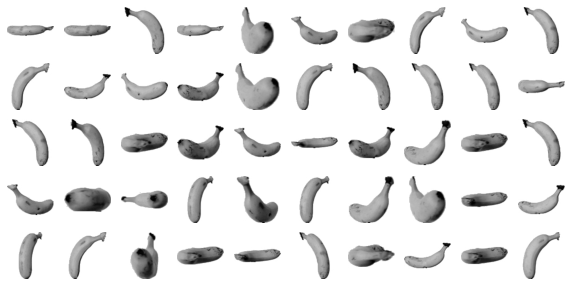

In [ ]:
plot_fruit(fruits[200:250])

## 픽셀들의 평균

In [ ]:
apple_px_mean = np.mean(apples, axis=0)
apple_px_mean.shape  #> (10000,)

(10000,)

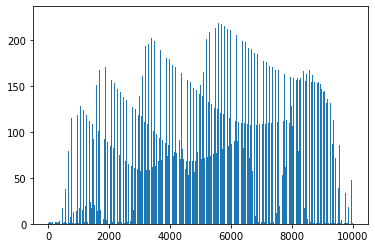

In [ ]:
plt.bar(x=np.arange(10_000), height=apple_px_mean)
plt.show()

In [ ]:
pineapples.shape

(100, 10000)

In [ ]:
pineapple_px_mean = np.mean(pineapples, axis=0)
pineapple_px_mean.shape

(10000,)

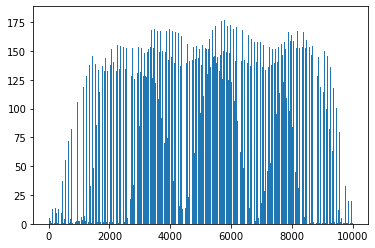

In [ ]:
plt.bar(x=np.arange(100*100), height=pineapple_px_mean)
plt.show()

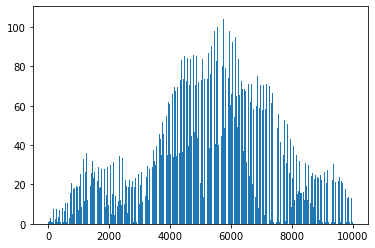

In [ ]:
banana_px_mean = np.mean(bananas, axis=0)
plt.bar(x=np.arange(100*100), height=banana_px_mean)
plt.show()

## 픽셀들의 평균을 100x100 모양의 이미지로 출력 

In [ ]:
apple_px_mean.shape, pineapple_px_mean.shape, banana_px_mean.shape

((10000,), (10000,), (10000,))

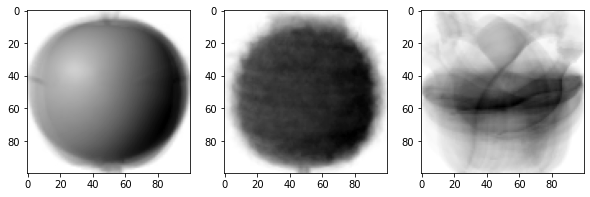

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
axes[0].imshow(apple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
axes[1].imshow(pineapple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
axes[2].imshow(banana_px_mean.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

## 픽셀들의 평균과 비슷한 이미지들 찾기

In [ ]:
fruits.shape

(300, 100, 100)

각각의 이미지와 픽셀들의 평균을 비교하기 위해서는 3차원 배열을 2차원 배열로 변환하는 것이 편함 

In [ ]:
fruits_2d = fruits.reshape((300, 100*100))
fruits_2d.shape

(300, 10000)

## 사과의 픽셀 평균들과 비슷한 이미지들 

In [ ]:
# 각 픽셀들이 떨어져 있는 거리를 계산
px_diff = fruits_2d - apple_px_mean #> (300, 10_000)
px_diff.shape

(300, 10000)

In [ ]:
# 거리의 제곱의 합을 계산 
dist_sq = np.sum(px_diff**2, axis=1) #> (300,)
dist_sq.shape

(300,)

In [ ]:
np.random.seed(42)
arr = np.random.uniform(0, 10, size=5)
print(arr)
arr.sort()
print(arr)
print(arr[:3])

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]
[1.5601864  3.74540119 5.98658484 7.31993942 9.50714306]
[1.5601864  3.74540119 5.98658484]


In [ ]:
np.random.seed(42)
arr = np.random.uniform(0, 10, size=5)
print(arr)
idx = arr.argsort()  # 오름차순 정렬된 배열을 만들 수 있는 인덱스
print(idx)
print(arr[idx])
print(arr[idx[:3]])

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]
[4 0 3 2 1]
[1.5601864  3.74540119 5.98658484 7.31993942 9.50714306]
[1.5601864  3.74540119 5.98658484]


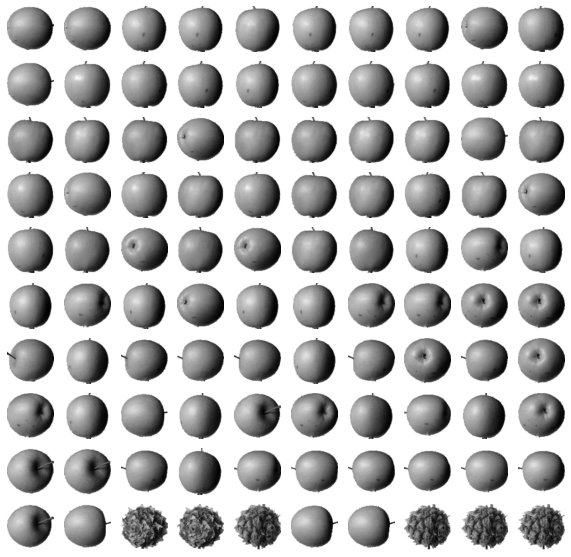

In [ ]:
# 거리 제곱들을 정렬해서 작은 순서로 100개를 선택
idx = dist_sq.argsort()
apple_like = idx[:100]  # 사과의 평균 픽셀과 가까운 100개 이미지의 인덱스 
plot_fruit(fruits[apple_like])

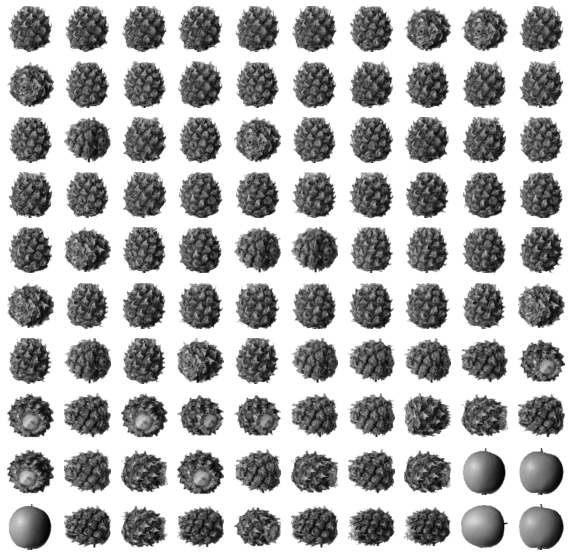

In [ ]:
# 파인애플 픽셀들의 평균과 가까운 이미지 100개 출력
dist_sq = np.sum((fruits_2d - pineapple_px_mean)**2, axis=1)
pineapple_like = dist_sq.argsort() 
plot_fruit(fruits[pineapple_like[:100]])

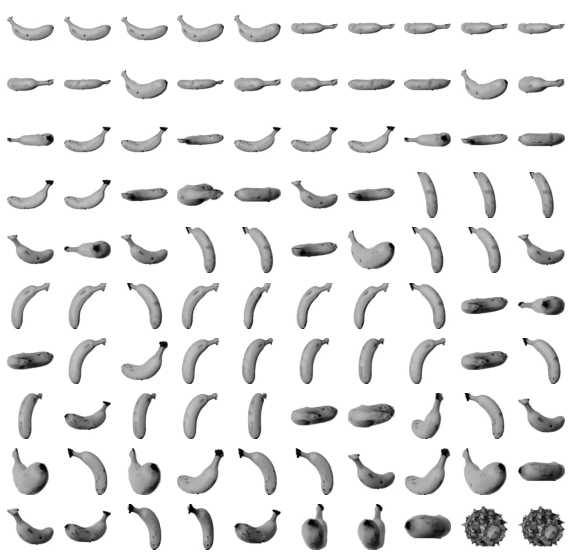

In [ ]:
# 바나나 픽셀들의 평균과 가까운 이미지 100개 출력 
dist_sq = np.sum((fruits_2d - banana_px_mean)**2, axis=1)
banana_like = dist_sq.argsort()                
plot_fruit(fruits[banana_like[:100]])

## 픽셀들의 차이의 절대값으로 군집화

# K-Means Clustering

In [ ]:
fruits.shape  #> (n_samples, height, width)

(300, 100, 100)

In [ ]:
fruits_2d.shape #> (n_samples, height*width)

(300, 10000)

In [ ]:
km = KMeans(n_clusters=3, random_state=42)  # 모델 생성

In [ ]:
km.fit(fruits_2d)  # 비지도 학습(unsupervised learning)인 경우에는 타겟(y)이 없음!
# 모델 학습
#> k개의 클러스터들의 중심(centroid)을 찾는 과정 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# 학습 결과 - 3개 클러스터의 중심 
km.cluster_centers_.shape  #> (3, 10000)

(3, 10000)

In [ ]:
km.cluster_centers_

array([[1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

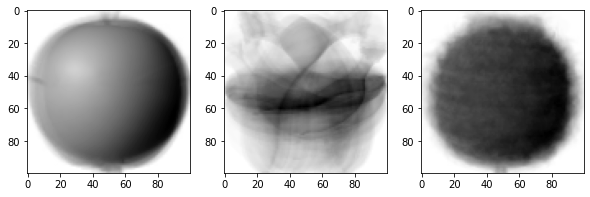

In [ ]:
# 클러스터 중심 시각화
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for i, center in enumerate(km.cluster_centers_): 
    ax[i].imshow(center.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

## 클러스터 레이블

In [ ]:
# 학습 결과 - 타겟(레이블)
km.labels_.shape #> (300,)

(300,)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))

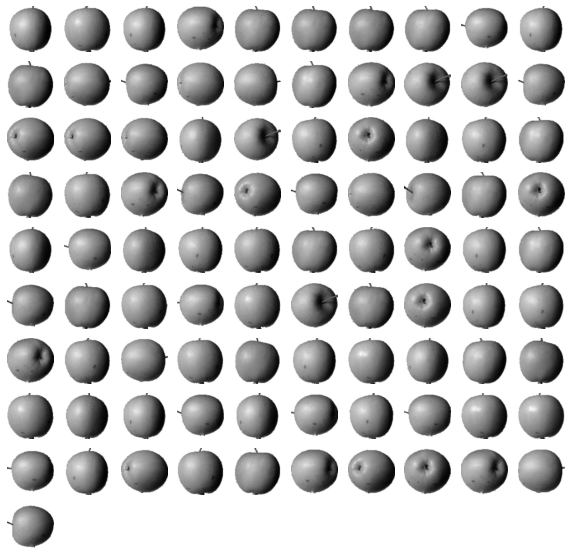

In [ ]:
plot_fruit(fruits[km.labels_ == 0])

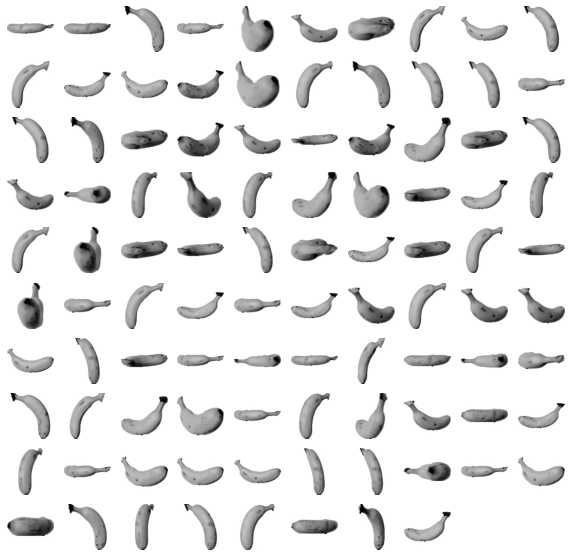

In [ ]:
plot_fruit(fruits[km.labels_ == 1])

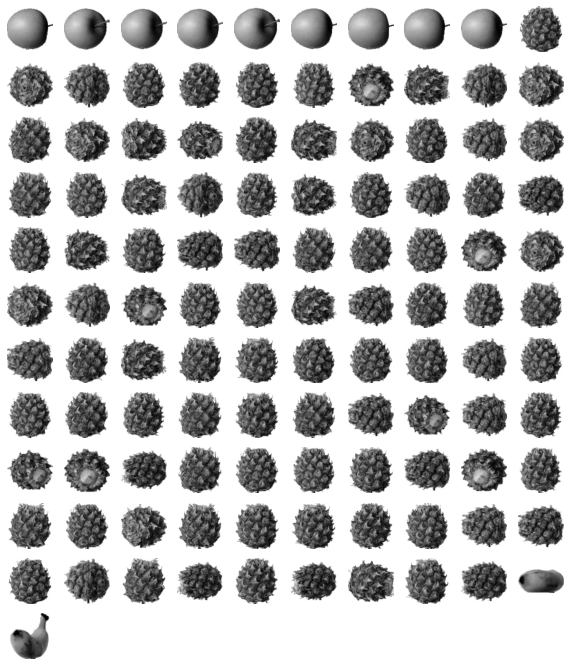

In [ ]:
plot_fruit(fruits[km.labels_ == 2])

`sklearn.cluster.KMeans.transfor(X)` 메서드: 

X에서 클러스터들의 중심까지의 거리들을 리턴. 

In [ ]:
distances = km.transform(fruits_2d[:6])
distances.shape  #> (6, 3) = (n_samples, n_clusters)

(6, 3)

In [ ]:
distances 

array([[3087.33092099, 8642.61845541, 4677.10527943],
       [2641.34592861, 9030.55531495, 5363.9344124 ],
       [3122.48819955, 8494.99543011, 4637.76848934],
       [3032.41637343, 9132.8299753 , 5319.2368841 ],
       [2656.96823141, 8461.52728232, 5039.67898148],
       [4874.81067384, 7855.57817995, 4368.90682127]])

In [ ]:
np.argmin(distances, axis=1)  #> KM.labels_

array([0, 0, 0, 0, 0, 2])

KMeans 알고리즘: 
* 설정한 k값 만큼의 클러스터들의 중심을 찾음(`KMeans.cluster_centers_`)
* transform() 메서드: 각 샘플에서 클러스터들의 중심까지의 거리들을 계산 
* 각 샘플에서 클러스터들의 중심까지의 거리들 중 가장 가까운 거리의 인덱스(`KMeans.labels_`)
* 타겟이 없는 데이터들을 군집화(clustering)함 

## 최적의 k 찾기

`inertia`: 
* 클러스터 중심과 클러스터에 속한 샘플들 사이의 거리들의 제곱의 합 
* 클러스터에 속한 샘플들이 얼마나 가깝게 모여 있는지를 나타내는 값 
* 일반적으로, 클러스터의 개수가 많을 수록 inertia 값은 작아짐 

In [ ]:
# k 값에 따른 inertia의 변화
inertias = []
ks = np.arange(1, 9)
for k in ks: # 여러 개의 k값마다 반복 
    km = KMeans(n_clusters=k, random_state=42)  # 모델 생성
    km.fit(fruits_2d)  # 모델 훈련 - 클러스터 중심 찾기 
    inertias.append(km.inertia_)

inertias

[9759303433.440002,
 5856532545.983117,
 5074977316.08837,
 4650031013.934268,
 4321786260.357199,
 4053173136.560072,
 3764082839.2808723,
 3457430801.500049]

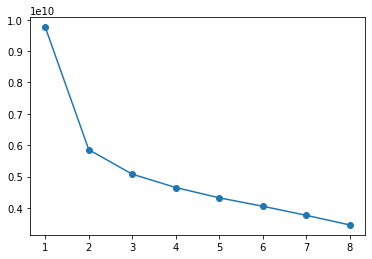

In [ ]:
plt.plot(ks, inertias, 'o-')
plt.show()

## MNIST KMeans

In [ ]:
mnist = fetch_openml(name='mnist_784')

In [ ]:
X = mnist['data'][:10_000]
X.shape

(10000, 784)

In [ ]:
np.unique(mnist['target'][:10_000], return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978]))

In [ ]:
# k값을 5~14 까지 변화시키면서 inertia를 계산, 시각화 

inertias = []
ks = np.arange(5, 15)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
    km.fit(X)
    inertias.append(km.inertia_)

inertias

[28063168748.210064,
 27272597741.29526,
 26682922484.25566,
 26172984409.94951,
 25658676553.49368,
 25238980176.25412,
 24868162125.631004,
 24501344926.69495,
 24194084895.33462,
 23878241751.33137]

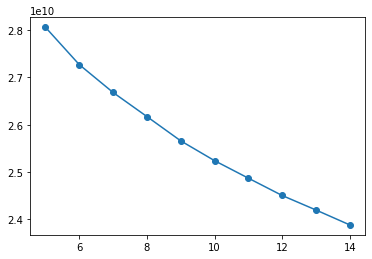

In [ ]:
plt.plot(ks, inertias, 'o-')
plt.show()

# PCA(Principal Component Analysis, 주성분분석)

In [ ]:
fruits.shape  # (300, 100, 100): n_samples, height, width 

(300, 100, 100)

In [ ]:
fruits_2d.shape  # (300, 10_000): n_samples, height*width

(300, 10000)

In [ ]:
# 모델 생성
pca = PCA(n_components=50, random_state=42)

In [ ]:
# 모델 훈련 
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# 훈련 결과 - 주성분(principal component)들을 찾음 
pca.components_.shape  #> (n_components, h*w)

(50, 10000)

In [ ]:
pca.n_components_  # fitting 후 찾은 주성분 개수 

50

In [ ]:
components = pca.components_.reshape((-1, 100, 100))
components.shape

(50, 100, 100)

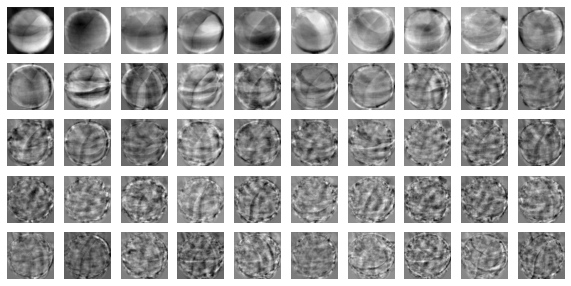

In [ ]:
plot_fruit(components)

## 차원 축소/복원

* `PCA.transform(X)`: X의 차원을 축소
* `PCA.inverse_transform(X)`: 원래 차원으로 재구성(복원)

In [ ]:
fruits_2d_reduce = pca.transform(fruits_2d)
fruits_2d_reduce.shape  #> (n_samples, n_components)
# (300, 10000) 모양의 fruits_2d 배열이 (300, 50) 모양의 fruits_2d_reduced 배열로 차원 축소 

(300, 50)

In [ ]:
fruits_2d_inverse = pca.inverse_transform(fruits_2d_reduce)
fruits_2d_inverse.shape  #> (300, 10000)

(300, 10000)

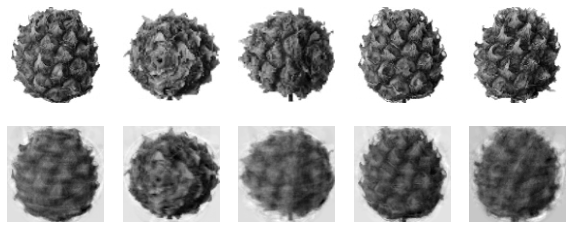

In [ ]:
# 차원 축소 전 원본 이미지 5개, 축소 후 복원된 이미지 5개
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
    ax[0, i].imshow(fruits[i+100], cmap=plt.cm.binary)
    ax[0, i].axis('off')
    ax[1, i].imshow(fruits_2d_inverse[i+100].reshape((100, 100)), cmap=plt.cm.binary)
    ax[1, i].axis('off')
plt.show()

## 설명된 분산(explained variance)

주성분(principal components)들이 원본 데이터의 분산(variance)을 얼마나 잘 설명하는지 정도를 나타내는 척도 

In [ ]:
pca.explained_variance_.shape  #> (50, )

(50,)

In [ ]:
pca.explained_variance_
# 주성분(principal components)의 순서대로 원 데이터의 분산들이 설명되므로, 
# explained_variance_ 특성의 값들은 점점 작아지게 됨 

array([13825250.21582002,  3244970.17261193,  2147002.11072804,
        1315766.76701664,  1115261.57182812,  1071019.42512441,
         839909.3351522 ,   670735.97206957,   447908.41090739,
         438278.50206896,   376058.33742495,   308314.26930361,
         286653.1247086 ,   276360.41324009,   226209.88296423,
         210588.11319903,   188950.25665911,   166854.81151665,
         158753.89250673,   156784.14766241,   146172.9076885 ,
         142739.15925164,   133183.8073018 ,   127118.51886608,
         121563.9978921 ,   117267.70755638,   108186.69143077,
         103713.31379144,    99261.91052115,    99135.70605002,
          94228.05385711,    90040.30447215,    86470.73077457,
          83465.17255061,    82295.02646471,    80663.90690084,
          78094.08591389,    75280.88252636,    72420.27941843,
          70737.72071461,    69455.75778694,    63067.95163101,
          62874.74546014,    62293.2008208 ,    59670.32106508,
          59000.95658326,    55741.88321

In [ ]:
# 설명된 분산 비율 
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.005112  , 0.00486381, 0.00480346,
       0.00447836, 0.00437316, 0.00408041, 0.00389459, 0.00372441,
       0.00359278, 0.00331456, 0.00317751, 0.00304113, 0.00303726,
       0.00288691, 0.0027586 , 0.00264924, 0.00255716, 0.00252131,
       0.00247134, 0.0023926 , 0.00230641, 0.00221877, 0.00216722,
       0.00212795, 0.00193224, 0.00192632, 0.0019085 , 0.00182815,
       0.00180764, 0.00170779, 0.00166414, 0.00162624, 0.00156195])

In [ ]:
np.sum(pca.explained_variance_ratio_)
# 50개의 중성분은 원 데이터(10,000개 성분) 분산의 92%를 설명 
# 10,000차원의 데이터를 50차원으로 축소했다가 원래 차원으로 재구성했을 때 92% 정도 복원 가능하다는 의미 

0.9213948508475206

## 최적의 주성분 개수

In [ ]:
pca = PCA()  # PCA 모델 생성 

In [ ]:
pca.fit(fruits_2d)  # PCA 모델 훈련 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_.shape  # 설명된 분산 비율 
# PCA 객체를 생성할 때 n_componenets를 설정하지 않으면(n_componenets=None),
# 주성분의 개수는 원자료의 샘플 개수와 원자료의 성분 개수 중에서 작은 값이 됨 

(300,)

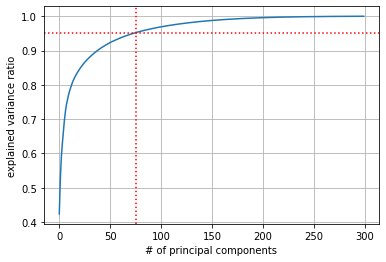

In [ ]:
# 누적 합계(cumulative sum)
evr_cumsum = np.cumsum(pca.explained_variance_ratio_)

# 설명된 분산 비율의 누적 합계 시각화 
plt.plot(evr_cumsum)
plt.axhline(y=0.95, color='red', linestyle='dotted')  # 전체 분산의 95%
plt.axvline(x=75, color='red', linestyle='dotted')
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('explained variance ratio')
plt.show()

In [ ]:
pca = PCA(n_components=0.95, random_state=42)  # 전체 분산의 95%를 설명할 수 있는 주성분 개수를 찾음

In [ ]:
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

74

In [ ]:
fruits_2d_reduced = pca.transform(fruits_2d)  # 차원 축소: 10,000 -> 74
fruits_2d_reduced.shape  #> (300, 74)

(300, 74)

In [ ]:
fruits_2d_inverse = pca.inverse_transform(fruits_2d_reduced)  # 차원 재구성: 74 - > 10,000
fruits_2d_inverse.shape  #> (300, 10000)

(300, 10000)

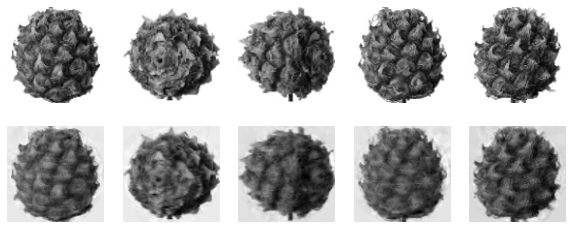

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
    ax[0, i].imshow(fruits[i+100], cmap=plt.cm.binary)
    ax[0, i].axis('off')
    ax[1, i].imshow(fruits_2d_inverse[i+100].reshape((100, 100)), cmap=plt.cm.binary)
    ax[1, i].axis('off')
plt.show()

# 이전 92% 였을 때보다 좀 더 뚜렷한 이미지를 보여준다(밑의 2행 이미지)

## 주성분 응용 - 시각화 

In [ ]:
# 10,000(100x100)차원 공간의 이미지들을 2차원 공간(principal componenet)으로 projection(투영)
pca = PCA(n_components=2, random_state=42)
pca.fit(fruits_2d)
fruits_2d_reduced = pca.transform(fruits_2d)   # 10,000차원 -> 2차원
fruits_2d_reduced.shape  # (300, 2)

(300, 2)

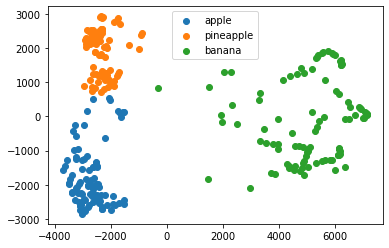

In [ ]:
X = fruits_2d_reduced
for i, target in enumerate(['apple', 'pineapple', 'banana']):
    plt.scatter(X[i*100:(i+1)*100, 0], X[i*100:(i+1)*100, 1], label=target)  # 100, 200, 300번으로 나누는 코드

plt.legend()
plt.show()

## PCA 응용 - 훈련 시간 단축. 성능 개선 

차원을 축소하지 않고 교차 검증 수행 - 시간, 성능 추정

In [ ]:
X = fruits_2d # 훈련 데이터
X.shape 

(300, 10000)

In [ ]:
y = np.array([0] * 100 + [1] * 100 + [2] * 100)  # 훈련 타겟 
y.shape

(300,)

In [ ]:
log_clf = LogisticRegression(random_state=42)

In [ ]:
cv = cross_validate(estimator=log_clf, X=X, y=y, return_train_score=True)

In [ ]:
cv['fit_time']

array([1.66468287, 1.51540518, 1.42928028, 1.4247942 , 1.56540108])

In [ ]:
np.sum(cv['fit_time'])

7.5995635986328125

In [ ]:
np.sum(cv['score_time'])

0.02230548858642578

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([1.        , 1.        , 1.        , 0.98333333, 1.        ])

95% 분산을 설명하는 주성분을 찾아서 차원 축소 - 훈련 시간, 성능 

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduce = pca.transform(X)
X_reduce.shape

(300, 74)

In [ ]:
cv = cross_validate(estimator=log_clf, X=X_reduce, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

0.160552978515625

In [ ]:
np.sum(cv['score_time'])

0.002069234848022461

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([1., 1., 1., 1., 1.])

* MNIST 데이터셋에서 95% 분산을 설명할 수 있는 주성분들을 찾고
* 훈련 데이터 차원 축소 전, RandomForest 교차 검증 시간, 성능(score) 측정
* 훈련 데이터 차원 축소 후, RandomForest 교차 검증 시간, 성능(score) 측정

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
X = mnist['data']
y = mnist['target']

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
num_train = 60_000
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

훈련 데이터 차원 축소 전, RandomForest 교차 검증 시간, 성능(score) 측정

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
cv = cross_validate(estimator=forest_clf, X=X_train, y=y_train, return_train_score=True)

In [ ]:
cv['fit_time']

array([35.17056298, 35.21229672, 35.33603287, 35.22116494, 35.46794105])

In [ ]:
np.sum(cv['fit_time'])

176.40799856185913

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([0.96808333, 0.96566667, 0.96541667, 0.962     , 0.97108333])

훈련 데이터 차원 축소 후, RandomForest 교차 검증 시간, 성능(score) 측정

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduced = pca.transform(X_train)
X_reduced.shape

(60000, 154)

In [ ]:
pca.n_components_

154

In [ ]:
cv = cross_validate(estimator=forest_clf, X=X_reduced, y=y_train, return_train_score=True)

In [ ]:
cv['fit_time']

array([88.40700817, 88.80297089, 88.75981593, 89.61958504, 88.68205166])

In [ ]:
np.sum(cv['fit_time'])

444.271431684494

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([0.94616667, 0.94333333, 0.93866667, 0.94158333, 0.94858333])

In [ ]:
X_reduced2 = pca.fit_transform(X_train)
X_reduced2.shape

(60000, 154)

In [ ]:
cv = cross_validate(estimator=forest_clf, X=X_reduced2, y=y_train, return_train_score=True)

In [ ]:
cv['fit_time']

array([89.0900228 , 89.90677905, 89.12093639, 89.64766407, 89.52220297])

In [ ]:
np.sum(cv['fit_time'])

447.28760528564453

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([0.94616667, 0.94333333, 0.93866667, 0.94158333, 0.94858333])